# p1.m - convergence of fourth-order finite differences

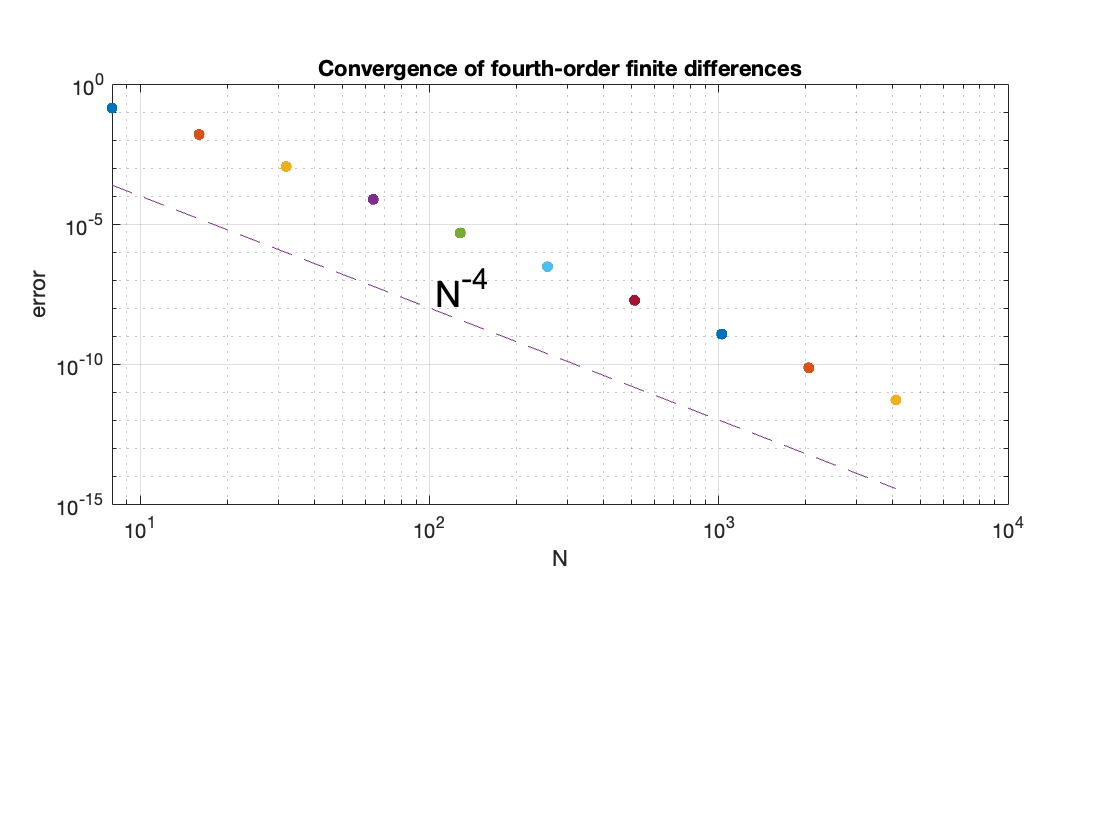

In [1]:
% For various N, set up grid in [-pi,pi] and function u(x):
  Nvec = 2.^(3:12);
  clf, subplot('position',[.1 .4 .8 .5])
  for N = Nvec
    h = 2*pi/N; x = -pi + (1:N)'*h;
    u = exp(sin(x)); uprime = cos(x).*u;

    % Construct sparse fourth-order differentiation matrix:
    e = ones(N,1);
    D =   sparse(1:N,[2:N 1],2*e/3,N,N)...
        - sparse(1:N,[3:N 1 2],e/12,N,N);
    D = (D-D')/h;

    % Plot max(abs(D*u-uprime)):
    error = norm(D*u-uprime,inf);
    loglog(N,error,'.','markersize',15), hold on
  end
  grid on, xlabel N, ylabel error
  title('Convergence of fourth-order finite differences')
  semilogy(Nvec,Nvec.^(-4),'--') 
  text(105,5e-8,'N^{-4}','fontsize',18)